# Morphologische Operationen
In diesem Notebook werden die Grundlagen der morphologischen Operatoren erläutert. Einige Ideen zu den hier gezeigten Beispielen stammen von [Bob Fisher der University of Edinborough](https://homepages.inf.ed.ac.uk/rbf/HIPR2/).

In [11]:
# init
import cv2 as cv
from matplotlib import pyplot as plt
from pathlib import Path
import numpy as np
from scipy.special import factorial

In [12]:
img_path = Path("../../data/images")

img_finger1 = cv.imread(str(img_path / "fingerabdruck.jpg"), cv.IMREAD_GRAYSCALE)
img_finger1 = cv.bitwise_not(img_finger1)

img_morph1 = cv.imread(str(img_path / "morph001.jpg"), cv.IMREAD_GRAYSCALE)
img_morph2 = cv.imread(str(img_path / "morph002.jpg"), cv.IMREAD_GRAYSCALE)
img_morph3 = cv.imread(str(img_path / "morph003.jpg"), cv.IMREAD_GRAYSCALE)
img_morph4 = cv.imread(str(img_path / "morph004.jpg"), cv.IMREAD_GRAYSCALE)
img_morph5 = cv.imread(str(img_path / "morph005.jpg"), cv.IMREAD_GRAYSCALE)
img_morph6 = cv.imread(str(img_path / "morph006.jpg"), cv.IMREAD_GRAYSCALE)
img_morph7 = cv.imread(str(img_path / "morph007.jpg"), cv.IMREAD_GRAYSCALE)

## Dilatation

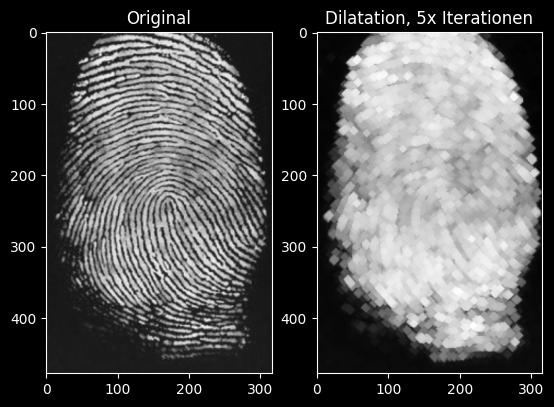

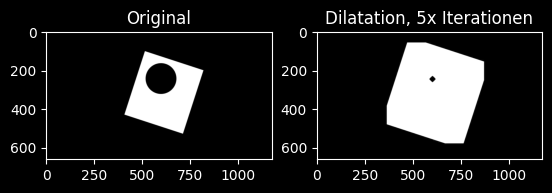

In [13]:
kernel_small5 = np.array([[0,1,0],[1,1,1],[0,1,0]], "uint8")
dilate_img_finger = cv.dilate(img_finger1, kernel_small5, iterations=5)
kernel_large = np.ones((20, 20), "uint8")
dilate_img_morph1 = cv.dilate(img_morph1, kernel_large, iterations=5)

plt.figure()
plt.subplot(1,2,1); plt.imshow(img_finger1, cmap="gray"); plt.title("Original")
plt.subplot(1,2,2); plt.imshow(dilate_img_finger, cmap="gray"); plt.title("Dilatation, 5x Iterationen")
plt.show()

plt.figure()
plt.subplot(1,2,1); plt.imshow(img_morph1, cmap="gray"); plt.title("Original")
plt.subplot(1,2,2); plt.imshow(dilate_img_morph1, cmap="gray"); plt.title("Dilatation, 5x Iterationen")
plt.show()

## Erosion

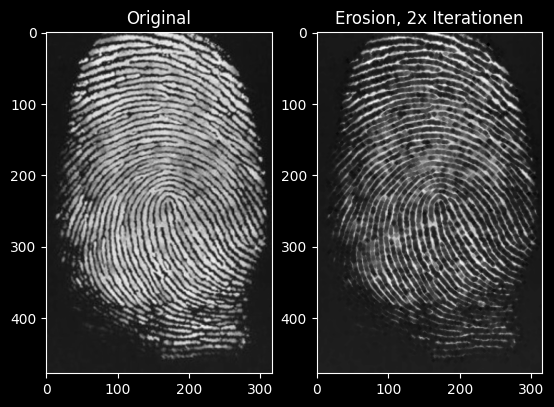

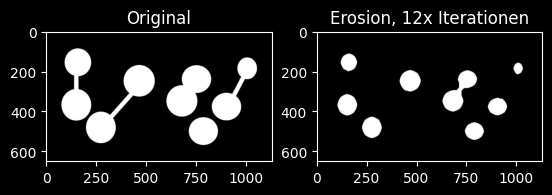

In [14]:
# Erosion
#kernel = np.ones((3, 3), "uint8")
kernel_small5 = np.array([[0,1,0],[1,1,1],[0,1,0]], "uint8")
erosion_img_finger = cv.erode(img_finger1, kernel_small5, iterations=2)
kernel_large21 = np.array([[0,1,1,1,0],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[0,1,1,1,0]], "uint8")
erosion_img_morph3 = cv.erode(img_morph3, kernel_large21, iterations=12)

plt.figure()
plt.subplot(1,2,1); plt.imshow(img_finger1, cmap="gray"); plt.title("Original")
plt.subplot(1,2,2); plt.imshow(erosion_img_finger, cmap="gray"); plt.title("Erosion, 2x Iterationen")
plt.show()

plt.figure()
plt.subplot(1,2,1); plt.imshow(img_morph3, cmap="gray"); plt.title("Original")
plt.subplot(1,2,2); plt.imshow(erosion_img_morph3, cmap="gray"); plt.title("Erosion, 12x Iterationen")
plt.show()

## Opening

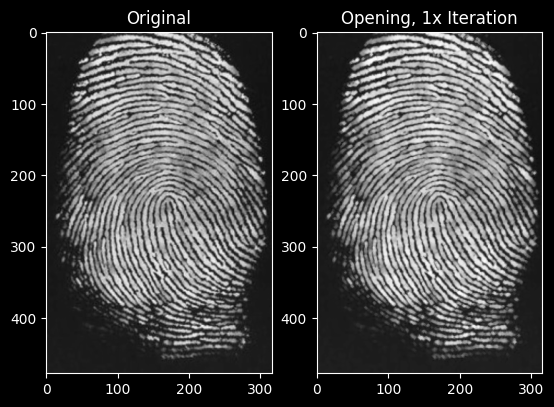

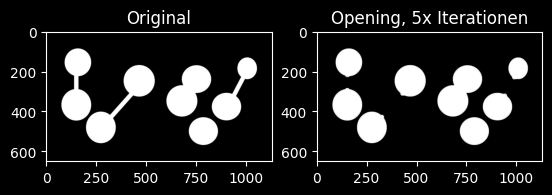

In [15]:
#kernel = np.ones((3, 3), "uint8")
kernel_small5 = np.array([[0,1,0],[1,1,1],[0,1,0]], "uint8")
opening_img_finger = cv.morphologyEx(img_finger1, cv.MORPH_OPEN, kernel_small5, iterations=1)
kernel_large21 = np.array([[0,1,1,1,0],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[0,1,1,1,0]], "uint8")
opening_img_morph3 = cv.morphologyEx(img_morph3, cv.MORPH_OPEN, kernel_large21, iterations=6)

plt.figure()
plt.subplot(1,2,1); plt.imshow(img_finger1, cmap="gray"); plt.title("Original")
plt.subplot(1,2,2); plt.imshow(opening_img_finger, cmap="gray"); plt.title("Opening, 1x Iteration")

plt.figure()
plt.subplot(1,2,1); plt.imshow(img_morph3, cmap="gray"); plt.title("Original")
plt.subplot(1,2,2); plt.imshow(opening_img_morph3, cmap="gray"); plt.title("Opening, 5x Iterationen")
plt.show()

## Closing

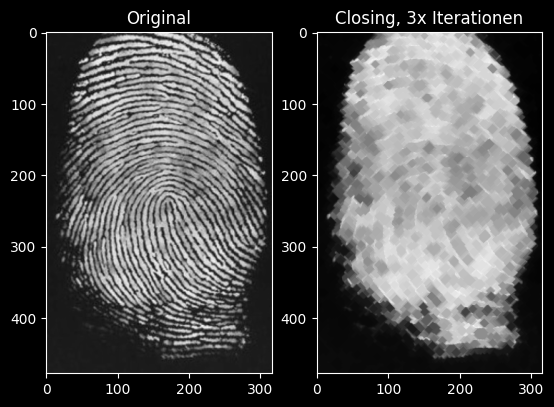

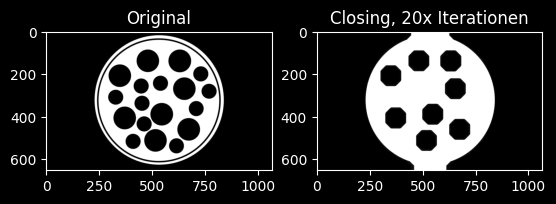

In [16]:
#kernel = np.ones((3, 3), "uint8")
kernel_small5 = np.array([[0,1,0],[1,1,1],[0,1,0]], "uint8")
closing_img_finger = cv.morphologyEx(img_finger1, cv.MORPH_CLOSE, kernel_small5, iterations=5)
kernel_large21 = np.array([[0,1,1,1,0],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[0,1,1,1,0]], "uint8")
closing_img_morph5 = cv.morphologyEx(img_morph5, cv.MORPH_CLOSE, kernel_large21, iterations=20)

plt.figure()
plt.subplot(1,2,1); plt.imshow(img_finger1, cmap="gray"); plt.title("Original")
plt.subplot(1,2,2); plt.imshow(closing_img_finger, cmap="gray"); plt.title("Closing, 3x Iterationen")
plt.show()

plt.figure()
plt.subplot(1,2,1); plt.imshow(img_morph5, cmap="gray"); plt.title("Original")
plt.subplot(1,2,2); plt.imshow(closing_img_morph5, cmap="gray"); plt.title("Closing, 20x Iterationen")
plt.show()

## Morphological Gradient

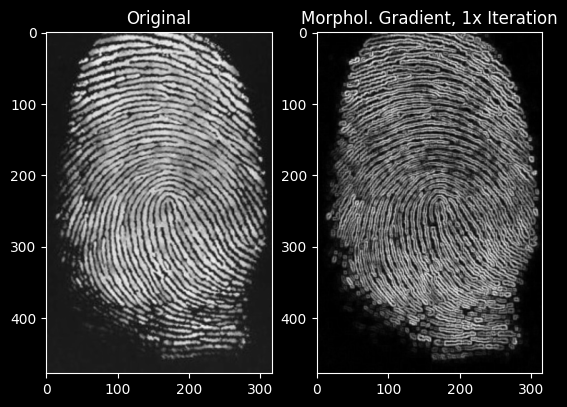

In [17]:
kernel = np.ones((3, 3), "uint8")
grad_img = cv.morphologyEx(img_finger1, cv.MORPH_GRADIENT, kernel, iterations=1)
plt.figure()
plt.subplot(1,2,1); plt.imshow(img_finger1, cmap="gray"); plt.title("Original")
plt.subplot(1,2,2); plt.imshow(grad_img, cmap="gray"); plt.title("Morphol. Gradient, 1x Iteration")
plt.show()

## Boundary Extraction

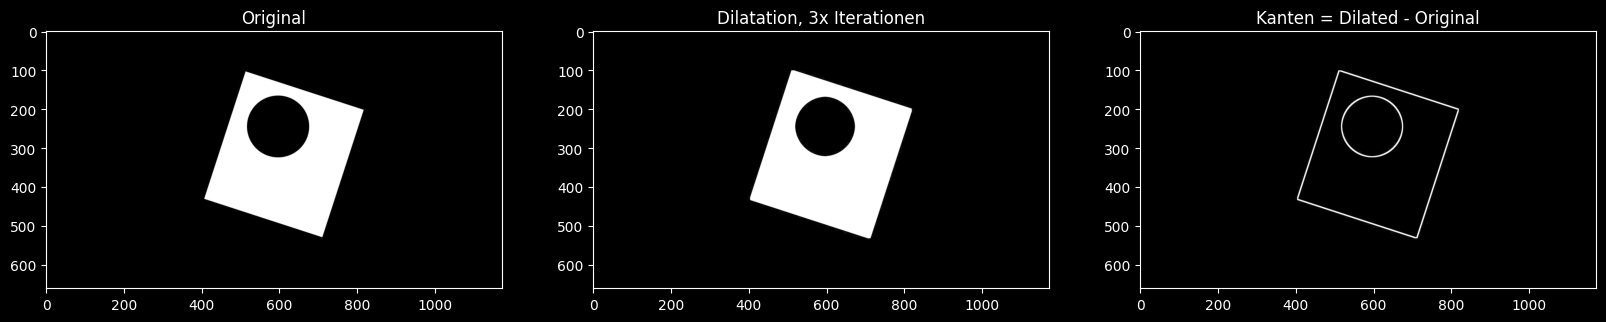

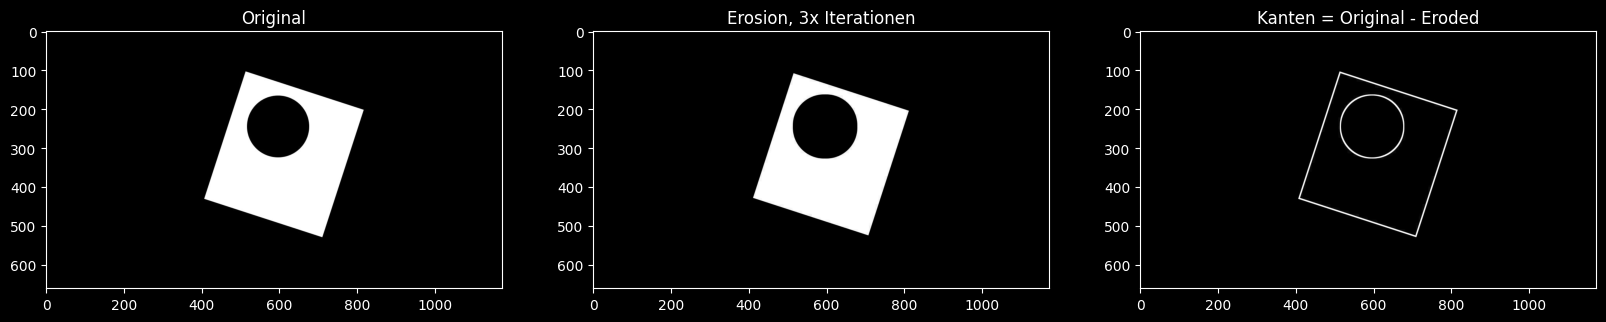

In [18]:
kernel_small = np.ones((3,3), "uint8")
dilate_img_morph12 = cv.dilate(img_morph1, kernel_small, iterations=3)
erosion_img_morph12 = cv.erode(img_morph1, kernel_small, iterations=3)

plt.figure(figsize=(20,5))
plt.subplot(1,3,1); plt.imshow(img_morph1, cmap="gray"); plt.title("Original")
plt.subplot(1,3,2); plt.imshow(dilate_img_morph12, cmap="gray"); plt.title("Dilatation, 3x Iterationen")
plt.subplot(1,3,3); plt.imshow(dilate_img_morph12-img_morph1, cmap="gray"); plt.title("Kanten = Dilated - Original")
plt.show()

plt.figure(figsize=(20,5))
plt.subplot(1,3,1); plt.imshow(img_morph1, cmap="gray"); plt.title("Original")
plt.subplot(1,3,2); plt.imshow(erosion_img_morph12, cmap="gray"); plt.title("Erosion, 3x Iterationen")
plt.subplot(1,3,3); plt.imshow(img_morph1-erosion_img_morph12, cmap="gray"); plt.title("Kanten = Original - Eroded")
plt.show()

## Hole Filling

Filled contours within  486  iterations.


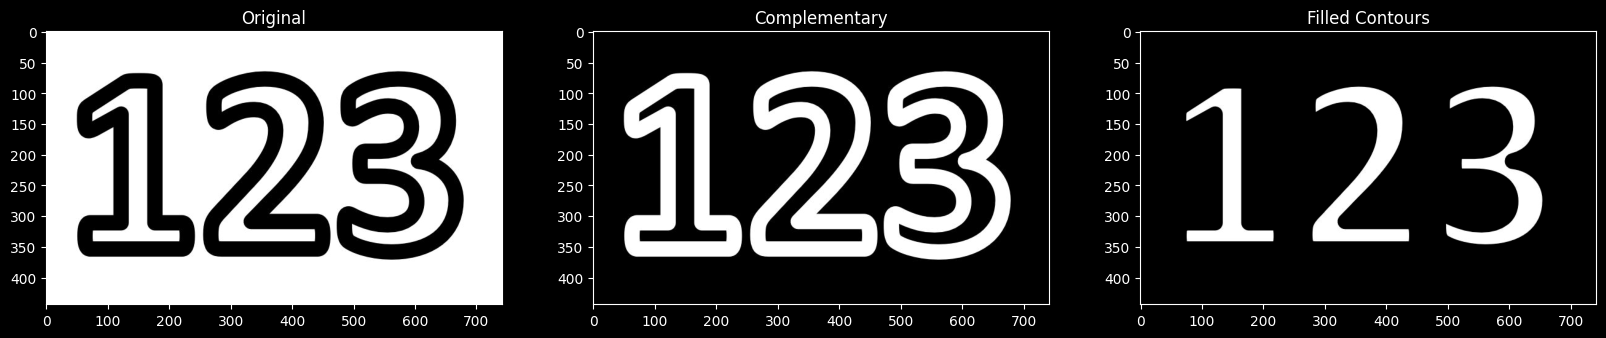

In [19]:
kernel_small5 = np.array([[0,1,0],[1,1,1],[0,1,0]], "uint8")
kernel_large = np.ones((5,5),"uint8")
img_new = img_morph7.copy()
# array initialized to zero, similar size like input image
img_filled = np.zeros_like(img_morph7)
#img_filled = np.full_like(img_morph7, 255, dtype="uint8")
# get complementary image
img_morph7_c = np.bitwise_not(img_morph7)
region_to_fill = [120,620]
# set user-defined pixels within holes / contours to 255
img_filled[120,150] = 255
img_filled[120,380] = 255
img_filled[120,620] = 255

max_iter = 500
for i in range(max_iter):
    img_new = cv.bitwise_and(img_morph7, cv.dilate(img_filled, kernel_small5))
    num_diff = np.sum(img_new - img_filled)
    img_filled = img_new
    if(num_diff == 0):
        print("Filled contours within ", i, " iterations.")
        break
    
plt.figure(figsize=(20,5))
plt.subplot(1,3,1); plt.imshow(img_morph7, cmap="gray"); plt.title("Original")
plt.subplot(1,3,2); plt.imshow(img_morph7_c, cmap="gray"); plt.title("Complementary")
plt.subplot(1,3,3); plt.imshow(img_filled, cmap="gray", vmin=0, vmax=255); plt.title("Filled Contours")
plt.show()

## Hit-or-Miss

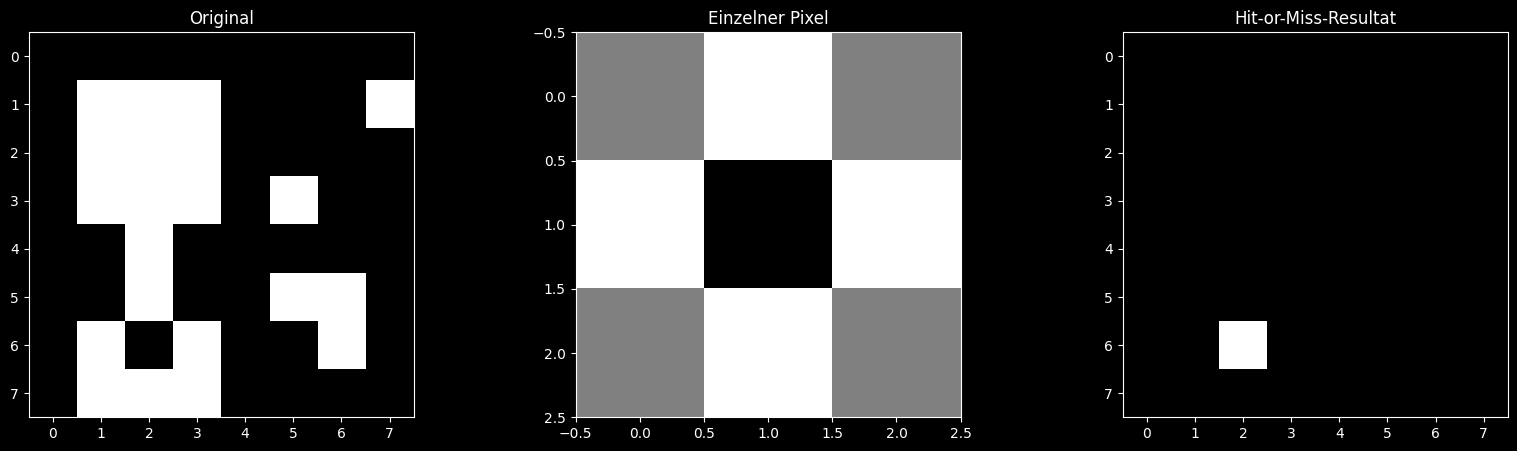

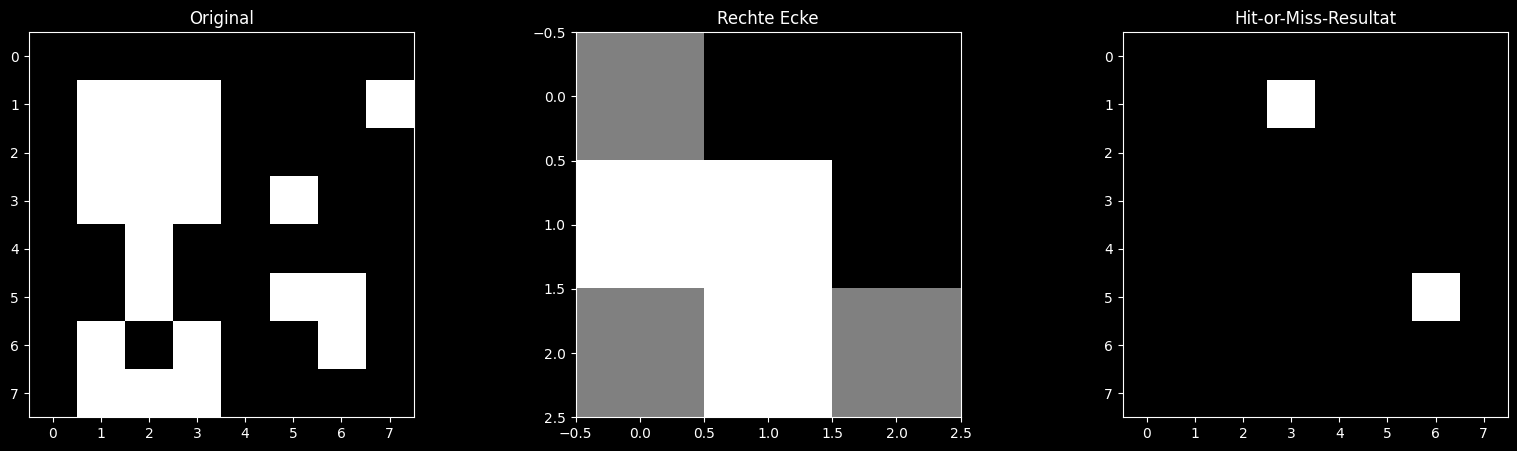

In [20]:
img = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 255, 255, 255, 0, 0, 0, 255],
        [0, 255, 255, 255, 0, 0, 0, 0],
        [0, 255, 255, 255, 0, 255, 0, 0],
        [0, 0, 255, 0, 0, 0, 0, 0],
        [0, 0, 255, 0, 0, 255, 255, 0],
        [0, 255, 0, 255, 0, 0, 255, 0],
        [0, 255, 255, 255, 0, 0, 0, 0]], dtype="uint8")

kernel_center = np.array([[0,1,0], [1,-1,1], [0,1,0]])
dst_morph_center = cv.morphologyEx(img, cv.MORPH_HITMISS, kernel_center)

plt.figure(figsize=(20,5))
plt.subplot(1,3,1); plt.imshow(img, cmap="gray"); plt.title("Original")
plt.subplot(1,3,2); plt.imshow(kernel_center, cmap="gray"); plt.title("Einzelner Pixel")
plt.subplot(1,3,3); plt.imshow(dst_morph_center, cmap="gray"); plt.title("Hit-or-Miss-Resultat")
plt.show()

# define kernel for right top corner
kernel_rightcorner = np.array([[0,-1,-1], [1,1,-1], [0,1,0]])
dst_morph_rightcorner = cv.morphologyEx(img, cv.MORPH_HITMISS, kernel_rightcorner)

plt.figure(figsize=(20,5))
plt.subplot(1,3,1); plt.imshow(img, cmap="gray"); plt.title("Original")
plt.subplot(1,3,2); plt.imshow(kernel_rightcorner, cmap="gray"); plt.title("Rechte Ecke")
plt.subplot(1,3,3); plt.imshow(dst_morph_rightcorner, cmap="gray"); plt.title("Hit-or-Miss-Resultat")
plt.show()


## Thinning

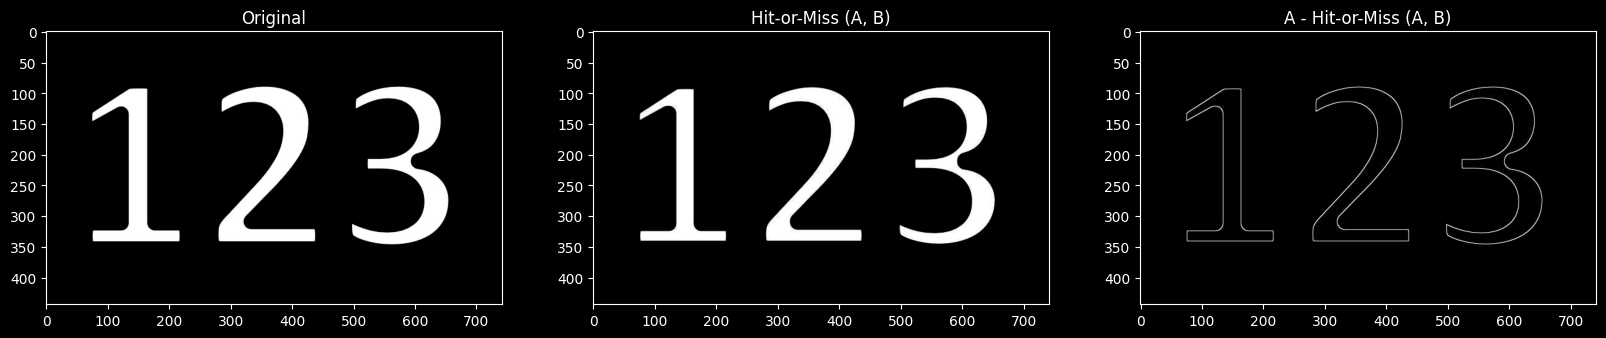

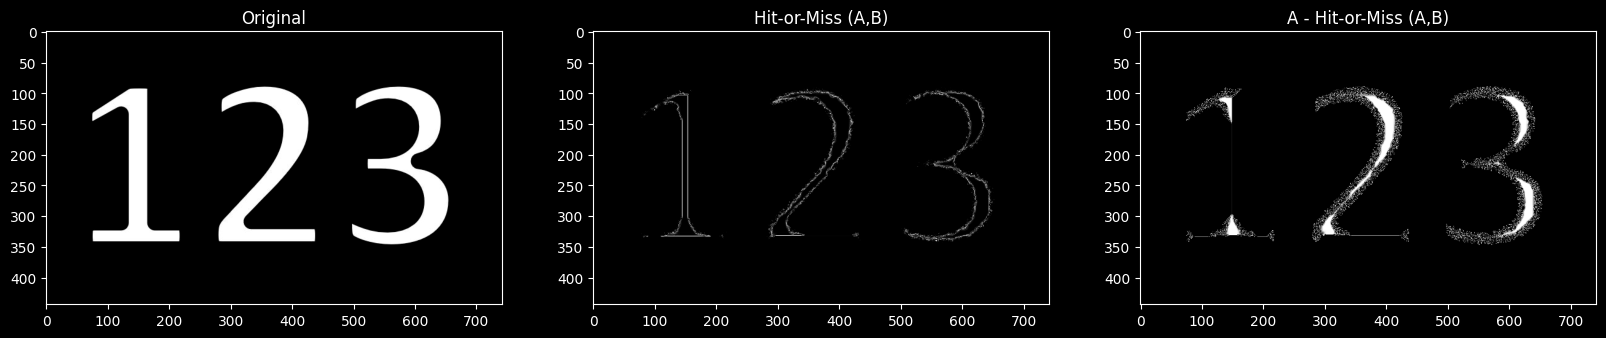

In [21]:
kernel_center = np.array([[1,1,1], [1,1,1], [1,1,1]])
#element = cv.getStructuringElement(cv.MORPH_CROSS,(3,3))
img_thin = cv.morphologyEx(img_filled, cv.MORPH_HITMISS, kernel_center)

plt.figure(figsize=(20,5))
plt.subplot(1,3,1); plt.imshow(img_filled, cmap="gray"); plt.title("Original")
plt.subplot(1,3,2); plt.imshow(img_thin, cmap="gray"); plt.title("Hit-or-Miss (A, B)")
plt.subplot(1,3,3); plt.imshow(img_filled - img_thin, cmap="gray"); plt.title("A - Hit-or-Miss (A, B)")

# lange Variante 
img = img_filled
plt.figure(figsize=(20,5))
plt.subplot(1,3,1); plt.imshow(img, cmap="gray"); plt.title("Original")

kernel1 = np.array((
        [[-1, -1, -1],
         [ 0,  1,  0],
         [ 1,  1,  1]]))

kernel2 = np.array((
        [[ 0, -1, -1],
         [ 1,  1, -1],
         [ 1,  1,  0]]))

#kernel1 = np.array((
#        [[-1, -1, -1],
#         [ 0,  1,  0],
#         [ 1,  1,  1]]))

#kernel2 = np.array((
#        [[0, -1, -1],
#        [1,   1, -1],
#        [0,   1,  0]]))

kernel3 = np.rot90(kernel1)
kernel4 = np.rot90(kernel2)
kernel5 = np.rot90(np.rot90(kernel1))
kernel6 = np.rot90(np.rot90(kernel2))
kernel7 = np.rot90(np.rot90(np.rot90(kernel1)))
kernel8 = np.rot90(np.rot90(np.rot90(kernel2)))
skel = np.zeros(img.shape,np.uint8)
mask = np.zeros(img.shape,np.uint8)
kernels = [kernel1, kernel2, kernel3, kernel4, kernel5, kernel6, kernel7, kernel8]
#kernels = [kernel1, kernel3, kernel5, kernel7]

max_iter = 15
for i in range(max_iter):
    mask = np.zeros(img.shape,np.uint8)

    for kernel in kernels:
        out_image = cv.morphologyEx(img, cv.MORPH_HITMISS, kernel)
        mask = cv.bitwise_or(out_image, mask)

    if(i==10):
        plt.subplot(1,3,2); plt.imshow(mask, cmap="gray"); plt.title("Hit-or-Miss (A,B)")
        
    img = img - mask

    if (np.sum(img - skel) == 0):
        print("Skeleton gefunden nach ", i, " Iterationen")
        break

    skel = img
    
plt.subplot(1,3,3); plt.imshow(skel, cmap="gray"); plt.title("A - Hit-or-Miss (A,B)")
plt.show()

## Optimierung Fingerabdruck

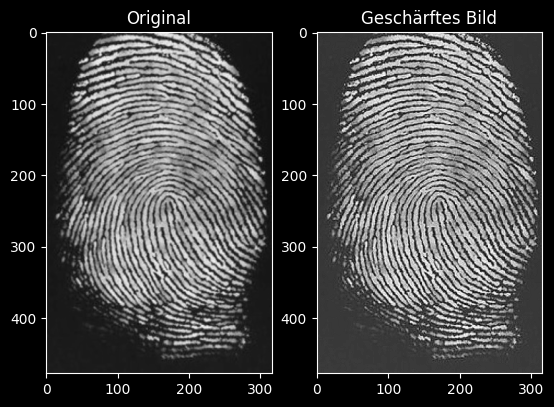

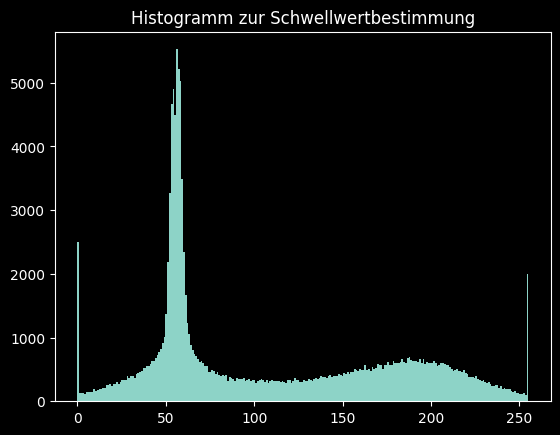

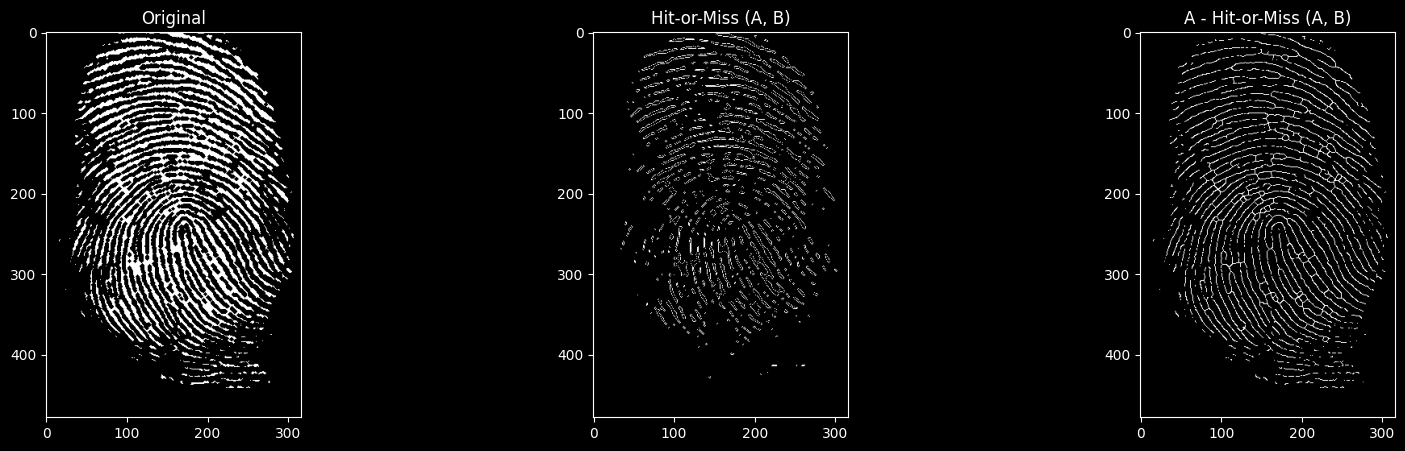

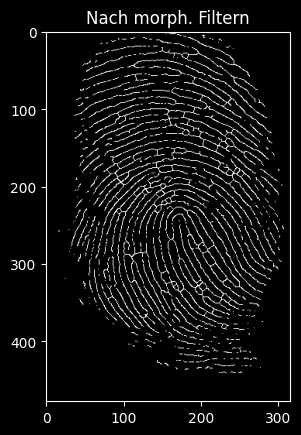

In [22]:
img = cv.imread(str(img_path / "fingerabdruck.jpg"), cv.IMREAD_GRAYSCALE)
img = cv.bitwise_not(img)

# 1. Schärfungsfilter
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
dst = cv.filter2D(img, -1, kernel)
plt.figure()
plt.subplot(1,2,1); plt.title("Original"); plt.imshow(img, cmap="gray")
plt.subplot(1,2,2); plt.imshow(dst, cmap="gray"); plt.title("Geschärftes Bild")
plt.show()

# 2. Anwendung Schwellwert
plt.figure()
plt.title("Histogramm zur Schwellwertbestimmung")
plt.hist(dst.ravel(), bins=256, range=(0,255))
plt.show()
th, dst = cv.threshold(dst, 150, 255, cv.THRESH_BINARY)

# 3. Anwendung morphologische Filter
kernel = np.array([[0,1,0],[1,1,1],[0,1,0]], "uint8")
dst = cv.dilate(dst, kernel, iterations=1)
dst = cv.erode(dst, kernel, iterations=2)
dst = cv.dilate(dst, kernel, iterations=2)
dst = cv.erode(dst, kernel, iterations=2)

# 4. Anwendung Hit-or-Miss Thinning
img = dst
kernel1 = np.array((
        [[-1, -1, -1],
         [ 0,  1,  0],
         [ 1,  1,  1]]))

kernel2 = np.array((
        [[ 0, -1, -1],
         [ 1,  1, -1],
         [ 1,  1,  0]]))

kernel3 = np.rot90(kernel1); kernel4 = np.rot90(kernel2); kernel5 = np.rot90(np.rot90(kernel1))
kernel6 = np.rot90(np.rot90(kernel2)); kernel7 = np.rot90(np.rot90(np.rot90(kernel1)))
kernel8 = np.rot90(np.rot90(np.rot90(kernel2)))
skel = np.zeros(img.shape,np.uint8)
mask = np.zeros(img.shape,np.uint8)
kernels = [kernel1, kernel2, kernel3, kernel4, kernel5, kernel6, kernel7, kernel8]

plt.figure(figsize=(20,5))
plt.subplot(1,3,1); plt.imshow(dst, cmap="gray"); plt.title("Original")

max_iter = 8
for i in range(max_iter):
    mask = np.zeros(img.shape,np.uint8)

    for kernel in kernels:
        out_image = cv.morphologyEx(img, cv.MORPH_HITMISS, kernel)
        mask = cv.bitwise_or(out_image, mask)            
        
    img = img - mask

    if (np.sum(img - skel) == 0):
        print("Skeleton gefunden nach ", i, " Iterationen")
        break

    skel = img
    
    if i == 1:
        plt.subplot(1,3,2); plt.imshow(mask, cmap="gray"); plt.title("Hit-or-Miss (A, B)")        

plt.subplot(1,3,3); plt.imshow(skel, cmap="gray"); plt.title("A - Hit-or-Miss (A, B)")

plt.figure()
plt.imshow(skel, cmap="gray")
plt.title("Nach morph. Filtern")
plt.show()

## Aufgabe: Rauschunterdrückung (Gauss)
Bitte entfernen Sie das Gaußsche Rauschen so gut wie möglich mithilfe von morph. Operatoren. Vergleichen Sie die Ergebnisse mit der Rauschunterdrückung durch Faltung.

In [23]:
# Bitte nur theoretisch / anhand eigener kleiner Beispiele diskutieren, welche Auswirkungen Gausssches Rauschen auf die morphologischen Operationen (Dilatation, Erosion, Opening, Closing) hat.
# Bei Dilatation werden Abweichungen, welchen den Pixelwert verringert haben entfernt und Abweichungen welche den Pixelwert erhöht haben verstärkt.
# Bei Erosion werden Abweichungen, welchen den Pixelwert verringert haben verstärkt und Abweichungen welche den Pixelwert erhöht haben entfernt.

# Beim Opening werden erst die Effekte der Erosion erzielt, nur um dann mit der Dilatation die verstärkten Abweichungen wieder abzuschwächen.
# Beim Closing werden erst die Effekte der Dilatation erzielt, nur um dann mit der Erosion die verstärkten Abweichungen wieder abzuschwächen.

## Aufgabe: Rauschunterdrückung (Salt-and-Pepper)
Bitte entfernen Sie das Salt-and-Pepper-Rauschen so gut wie möglich mithilfe von morph. Operatoren. Vergleichen Sie die Ergebnisse mit der Rauschunterdrückung durch Faltung.

In [24]:
# Bitte nur theoretisch / anhand eigener kleiner Beispiele diskutieren, welche Auswirkungen Salt-and-Pepper Rauschen auf die morphologischen Operationen (Dilatation, Erosion, Opening, Closing) hat.
# Bei der Erosion werden alle weißen Pixel entfernt und die schwarzen Pixel breiten sich aus.
# Bei der Dilatation werden alle schwarzen Pixel entfernt und die weißen Pixel breiten sich aus.

# Beim Opening werden erst die Effekte der Erosion erzielt, nur um dann mit der Dilatation die vermehrten schwarzen Pixel wieder zu verringern
# Beim Closing werden erst die Effekte der Dilatation erzielt, nur um dann mit der Erosion die vermehrten weißen Pixel wieder zu verringern

# Würde Opening nach Closing oder andersherum verwendet werden, sollte dies zur Entfernung von nahezu allem Salt-and-Pepper Rauschen führen.

## Aufgabe: Separation der einzelnen Kreise
Bitte separieren Sie die einzelnen Kreise, sodass Sie keine Überschneidung mehr haben.

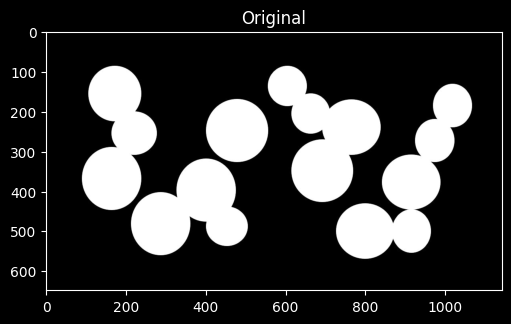

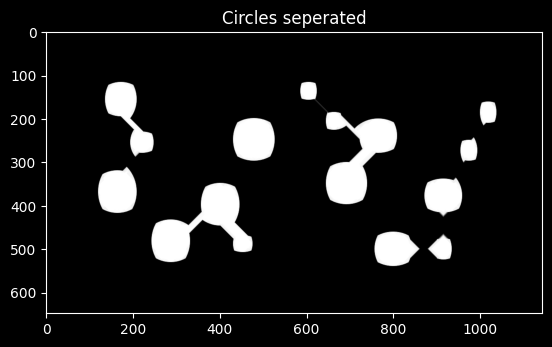

In [25]:
# bitte arbeiten Sie mit img_morph002.jpg bzw img_morph2

kernel = np.array([[0,1,0],[1,1,1],[0,1,0]], "uint8")
img_morph2_erode = cv.erode(img_morph2, kernel, iterations=30)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(img_morph2, cmap="gray")
plt.title("Original")
plt.show()
plt.imshow(img_morph2_erode, cmap="gray")
plt.title("Circles seperated")
plt.show()

## Aufgabe: Filter für horizontale und vertikale Linien
Bitte wenden Sie morphologische Filter an, sodass in zwei getrennten Ergebnisbildern ausschließlich die horizontalen im ersten und die vertikalen Linien im zweiten Bild zu sehen sind.

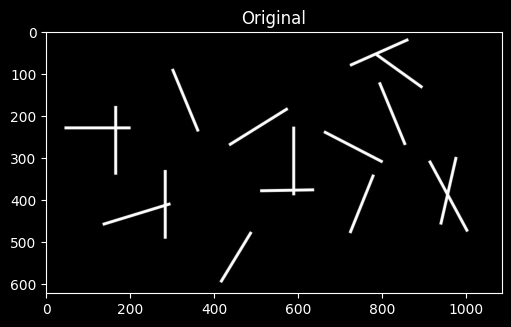

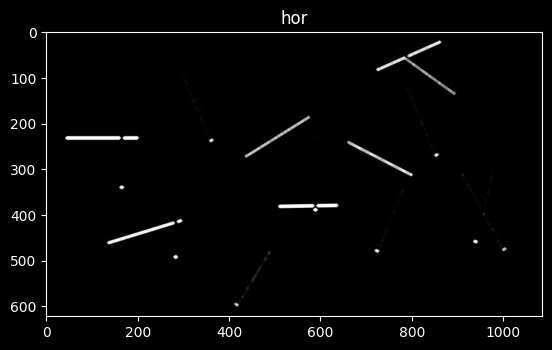

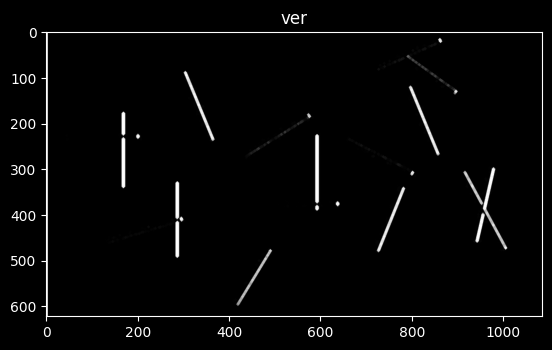

In [26]:
# bitte arbeiten Sie mit img_morph004.jpg bzw img_morph4

kernel = np.array([[0,1,0],[1,1,1],[0,1,0]], "uint8")

kernel_hor = np.array([[1,1,1], [0,0,0], [-1,-1,-1]])
dst_morph_hor = cv.morphologyEx(img_morph4, cv.MORPH_HITMISS, kernel_hor)
dst_morph_hor = cv.dilate(dst_morph_hor, kernel, iterations=3)

kernel_ver = np.array([[1,0,-1], [1,0,-1], [1,0,-1]])
dst_morph_ver = cv.morphologyEx(img_morph4, cv.MORPH_HITMISS, kernel_ver)
dst_morph_ver = cv.dilate(dst_morph_ver, kernel, iterations=3)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(img_morph4, cmap="gray")
plt.title("Original")
plt.show()
plt.imshow(dst_morph_hor, cmap="gray")
plt.title("hor")
plt.show()
plt.imshow(dst_morph_ver, cmap="gray")
plt.title("ver")
plt.show()

## Aufgabe: Wie können morphologische Operatoren für die Erkennung von Fahrbahnmarkierungen genutzt werden

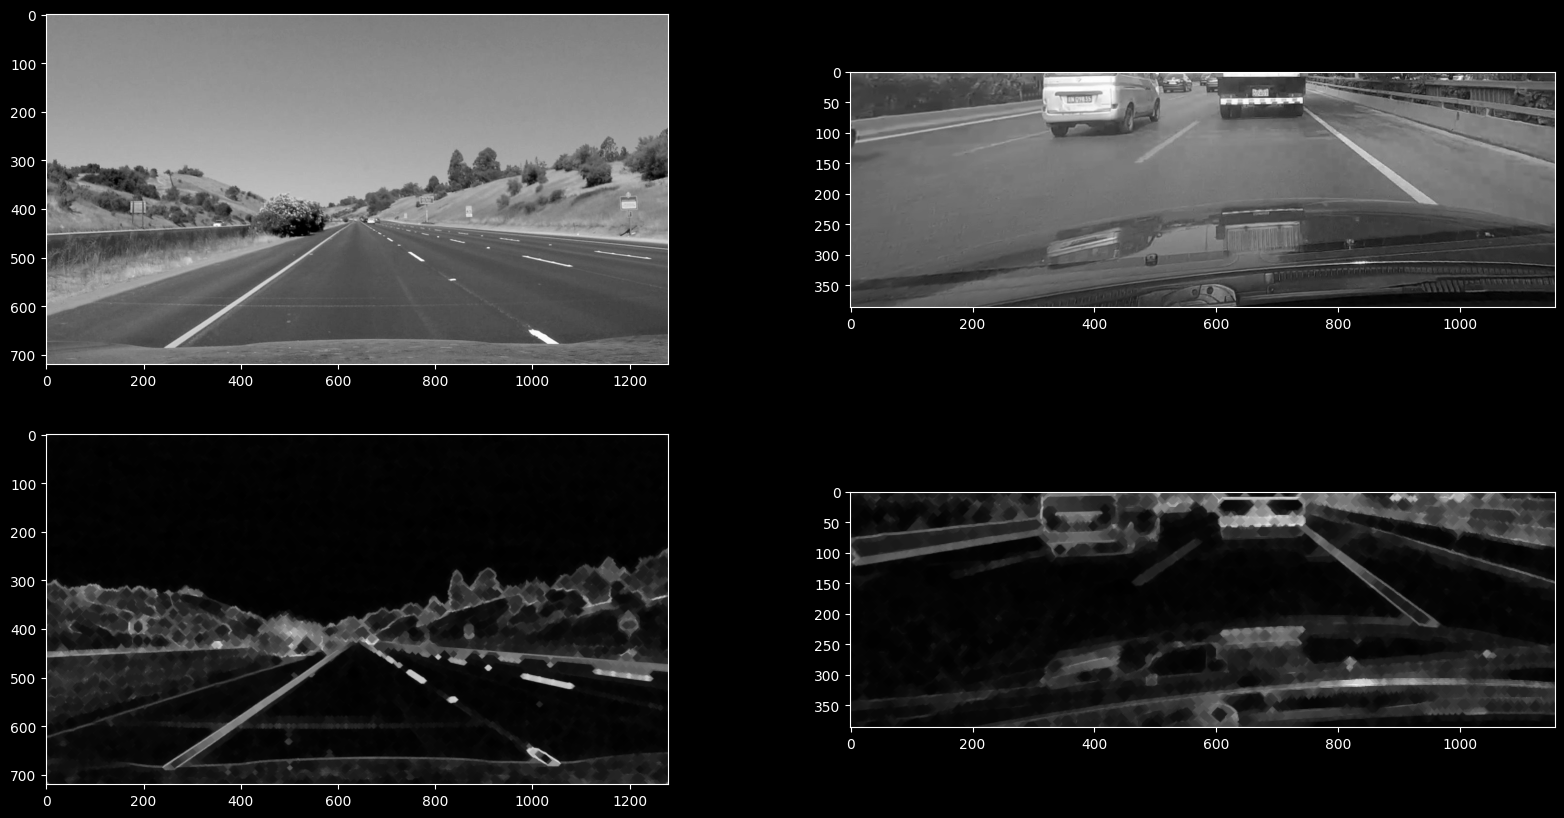

In [27]:
img_lane1 = cv.cvtColor(cv.imread(str(img_path / "image001.jpg")), cv.COLOR_BGR2GRAY)
img_lane2 = cv.cvtColor(cv.imread(str(img_path / "uclanes_ex.jpg")), cv.COLOR_BGR2GRAY)

#kernel_ver = np.array([[1,0.5,-0.5,-1], [0.5,1,-0.5,-1], [-1,-0.5,1,0.5], [-1,-0.5,0.5,1]])
#dst_morph_ver = cv.morphologyEx(img_lane2, cv.MORPH_HITMISS, kernel_ver)
dilated_img_lane1 = cv.dilate(img_lane1, kernel, iterations=5)
boundaries1 = cv.subtract(dilated_img_lane1, img_lane1)

dilated_img_lane2 = cv.dilate(img_lane2, kernel, iterations=5)
boundaries2 = cv.subtract(dilated_img_lane2, img_lane2)

closing_boundaries1 = cv.morphologyEx(boundaries1, cv.MORPH_CLOSE, kernel_small5, iterations=7)
closing_boundaries2 = cv.morphologyEx(boundaries2, cv.MORPH_CLOSE, kernel_small5, iterations=7)

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.imshow(img_lane1, cmap="gray")
plt.subplot(2,2,2)
plt.imshow(img_lane2, cmap="gray")
plt.subplot(2,2,3)
plt.imshow(closing_boundaries1, cmap="gray")
plt.subplot(2,2,4)
plt.imshow(closing_boundaries2, cmap="gray")
plt.show()